# 1 часть

In [1]:
import math
import matplotlib.pyplot as plt

class Robot:
    def __init__(self, name, x=0.0, y=0.0, heading_deg=0.0):
        self.name = name
        self.x = float(x)
        self.y = float(y)
        self.heading_deg = float(heading_deg)
        self.history = [(self.x, self.y)]

    def move_forward(self, distance):
        rad = math.radians(self.heading_deg)
        self.x += distance * math.cos(rad)
        self.y += distance * math.sin(rad)
        self.history.append((self.x, self.y))

    def turn(self, angle_deg):
        self.heading_deg = (self.heading_deg + angle_deg) % 360.0

    def draw_polygon(self, n, side_length):
        if n < 3:
            raise ValueError("n должно быть ≥ 3")
        angle = 360.0 / n
        for _ in range(n):
            self.move_forward(side_length)
            self.turn(angle)

    def get_path(self):
        xs, ys = zip(*self.history)
        return xs, ys

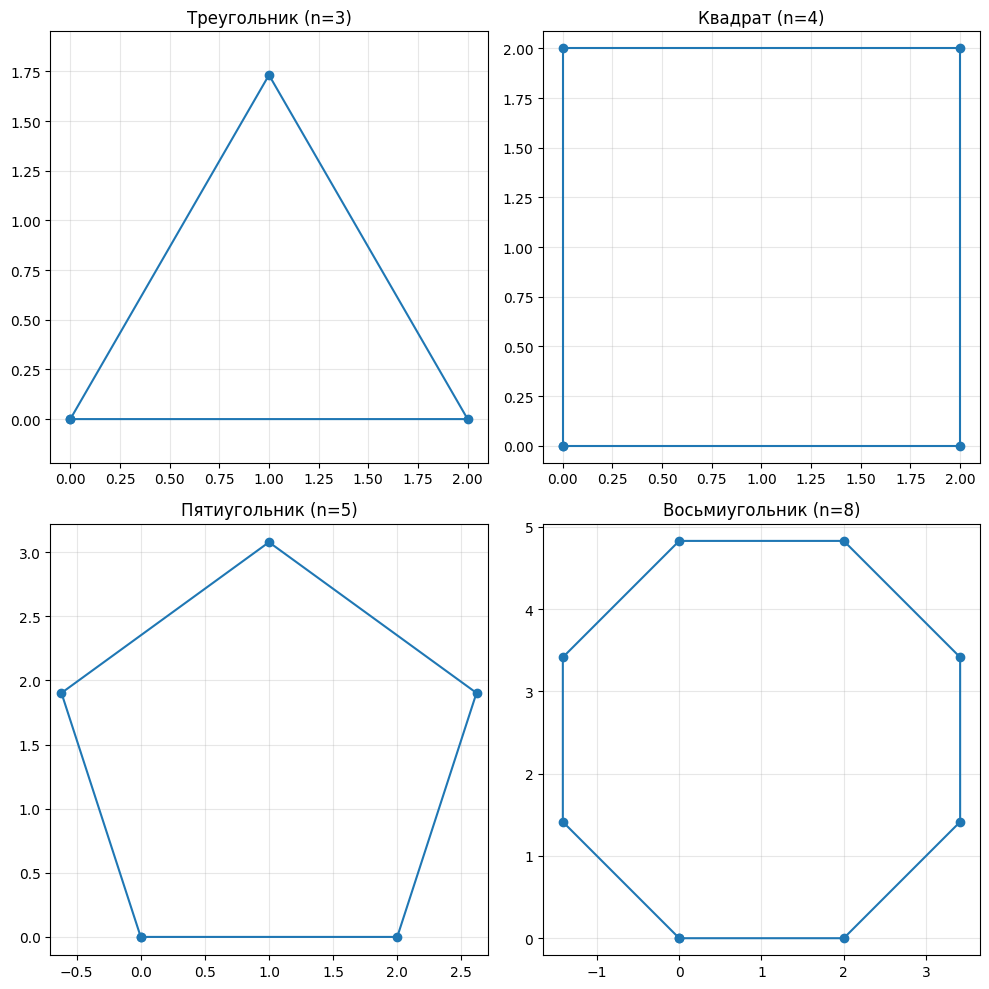

In [8]:
# Визуализация 4 многоугольников на одном рисунке (2x2)
plt.figure(figsize=(10, 10))

# 1. Треугольник
plt.subplot(2, 2, 1)
r1 = Robot("Треугольник")
r1.draw_polygon(n=3, side_length=2.0)
x1, y1 = r1.get_path()
plt.plot(x1, y1, '-o')
plt.axis('equal'); plt.grid(True, alpha=0.3)
plt.title("Треугольник (n=3)")

# 2. Квадрат
plt.subplot(2, 2, 2)
r2 = Robot("Квадрат")
r2.draw_polygon(n=4, side_length=2.0)
x2, y2 = r2.get_path()
plt.plot(x2, y2, '-o')
plt.axis('equal'); plt.grid(True, alpha=0.3)
plt.title("Квадрат (n=4)")

# 3. Пятиугольник
plt.subplot(2, 2, 3)
r3 = Robot("Пятиугольник")
r3.draw_polygon(n=5, side_length=2.0)
x3, y3 = r3.get_path()
plt.plot(x3, y3, '-o')
plt.axis('equal'); plt.grid(True, alpha=0.3)
plt.title("Пятиугольник (n=5)")

# 4. Восьмиугольник
plt.subplot(2, 2, 4)
r4 = Robot("Восьмиугольник")
r4.draw_polygon(n=8, side_length=2.0)
x4, y4 = r4.get_path()
plt.plot(x4, y4, '-o')
plt.axis('equal'); plt.grid(True, alpha=0.3)
plt.title("Восьмиугольник (n=8)")

plt.tight_layout()
plt.show()

# 2 часть

In [9]:
import math
import matplotlib.pyplot as plt

class Robot:
    def __init__(self, name, x=0.0, y=0.0, heading_deg=0.0, speed=10.0, dt=0.01):
        self.name = name
        self.x = float(x)
        self.y = float(y)
        self.heading_deg = float(heading_deg)
        self.speed = float(speed)
        self.angular_speed = 0.0
        self.dt = float(dt)
        self.history = [(self.x, self.y)]

    def set_speed(self, new_speed):
        self.speed = float(new_speed)

    def set_angular_speed(self, new_speed):
        self.angular_speed = float(new_speed)

    def update(self):

        self.heading_deg = (self.heading_deg + self.angular_speed * self.dt) % 360.0

        rad = math.radians(self.heading_deg)
        self.x += self.speed * math.cos(rad) * self.dt
        self.y += self.speed * math.sin(rad) * self.dt

        self.history.append((self.x, self.y))

    def simulate(self, time_s):
        if time_s <= 0:
            return
        steps = int(time_s // self.dt)
        remainder = time_s - steps * self.dt
        for _ in range(steps):
            self.update()
        if remainder > 0:
            old_dt = self.dt
            self.dt = remainder
            self.update()
            self.dt = old_dt


    def move_forward(self, distance):
        if self.speed == 0:
            raise ValueError("speed == 0. Установите ненулевую скорость через set_speed().")
        t = distance / self.speed
        prev_omega = self.angular_speed
        self.set_angular_speed(0.0)
        self.simulate(t)
        self.set_angular_speed(prev_omega)

    def turn(self, angle_deg):
        self.heading_deg = (self.heading_deg + angle_deg) % 360.0

    def draw_polygon(self, n, side_length):
        if n < 3:
            raise ValueError("n должно быть ≥ 3")
        angle = 360.0 / n
        for _ in range(n):
            self.move_forward(side_length)
            self.turn(angle)


    def draw_rounded_polygon(self, n, side_length, radius):
        if n < 3:
            raise ValueError("n должно быть ≥ 3")
        if radius <= 0:
            raise ValueError("radius должен быть > 0")

        external_angle_deg = 360.0 / n
        if self.speed <= 0:
            raise ValueError("speed должно быть > 0. Установите через set_speed().")

        t_move = side_length / self.speed

        omega_deg = (self.speed / radius) * (180.0 / math.pi)
        if omega_deg == 0:
            raise ValueError("omega == 0. Проверьте speed и radius.")

        t_arc = external_angle_deg / omega_deg

        for _ in range(n):

            self.set_angular_speed(0.0)
            self.simulate(t_move)


            self.set_angular_speed(omega_deg)
            self.simulate(t_arc)


        self.set_angular_speed(0.0)

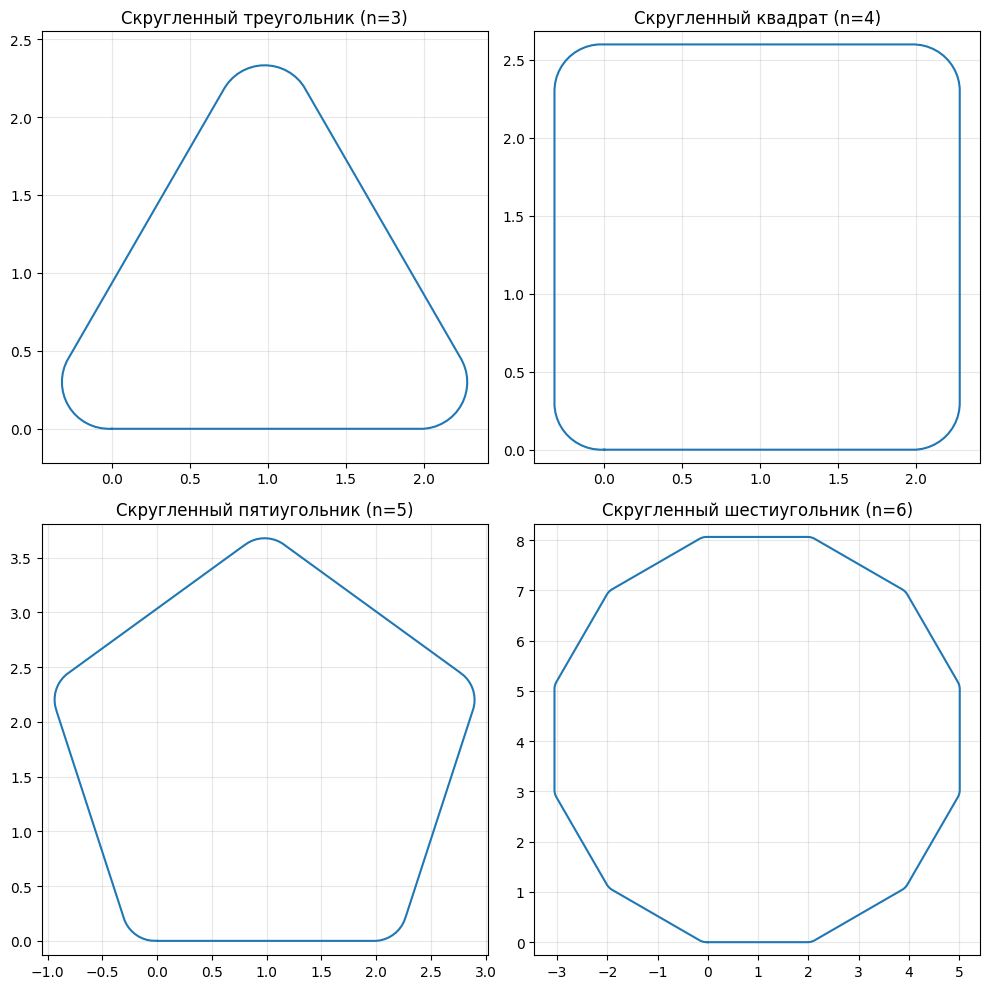

In [14]:
plt.figure(figsize=(10, 10))

# 1) Скругленный треугольник
plt.subplot(2, 2, 1)
r1 = Robot("rounded-3", speed=8.0, dt=0.005)
r1.draw_rounded_polygon(n=3, side_length=2.0, radius=0.3)
x1, y1 = zip(*r1.history)
plt.plot(x1, y1, '-')
plt.title("Скругленный треугольник (n=3)")
plt.axis('equal'); plt.grid(True, alpha=0.3)

# 2) Скругленный квадрат
plt.subplot(2, 2, 2)
r2 = Robot("rounded-4", speed=8.0, dt=0.005)
r2.draw_rounded_polygon(n=4, side_length=2.0, radius=0.3)
x2, y2 = zip(*r2.history)
plt.plot(x2, y2, '-')
plt.title("Скругленный квадрат (n=4)")
plt.axis('equal'); plt.grid(True, alpha=0.3)

# 3) Скругленный пятиугольник
plt.subplot(2, 2, 3)
r3 = Robot("rounded-5", speed=8.0, dt=0.005)
r3.draw_rounded_polygon(n=5, side_length=2.0, radius=0.3)
x3, y3 = zip(*r3.history)
plt.plot(x3, y3, '-')
plt.title("Скругленный пятиугольник (n=5)")
plt.axis('equal'); plt.grid(True, alpha=0.3)

# 4) Скругленный шестиугольник
plt.subplot(2, 2, 4)
r4 = Robot("rounded-6", speed=8.0, dt=0.005)
r4.draw_rounded_polygon(n=12, side_length=2.0, radius=0.3)
x4, y4 = zip(*r4.history)
plt.plot(x4, y4, '-')
plt.title("Скругленный шестиугольник (n=6)")
plt.axis('equal'); plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()